Loading and inspecting the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#reading the dataset
url = 'archive (2)/household_power_consumption.csv'
ds = pd.read_csv(url)

In [2]:
from datetime import datetime

# Since the dates are in irregular form, convert these dates to dd/mm/yyyy form:
# Function to convert date to the desired format


def convert_to_full_year(date_str):
    try:
        parsed_date = datetime.strptime(date_str, '%d/%m/%y')
        converted_date = parsed_date.strftime('%d/%m/%Y')

        return converted_date
    except ValueError:
        return date_str


ds['Date'] = ds['Date'].apply(convert_to_full_year)


In [3]:
# Convert 'Date' and 'Time' columns to datetime format
ds['Date'] = pd.to_datetime(ds['Date'], format='%d/%m/%Y')
ds['Time'] = pd.to_timedelta(ds['Time'])


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)


In [5]:
#read the head
ds.head()

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,2007-01-01,0 days 00:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1,2007-01-01,0 days 00:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,2,2007-01-01,0 days 00:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,3,2007-01-01,0 days 00:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,4,2007-01-01,0 days 00:04:00,2.554,0.1,241.98,10.4,0,0,0.0


In [6]:
#data info
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260640 entries, 0 to 260639
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   index                  260640 non-null  int64          
 1   Date                   260640 non-null  datetime64[ns] 
 2   Time                   260640 non-null  timedelta64[ns]
 3   Global_active_power    260640 non-null  object         
 4   Global_reactive_power  260640 non-null  object         
 5   Voltage                260640 non-null  object         
 6   Global_intensity       260640 non-null  object         
 7   Sub_metering_1         260640 non-null  object         
 8   Sub_metering_2         260640 non-null  object         
 9   Sub_metering_3         256869 non-null  float64        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6), timedelta64[ns](1)
memory usage: 19.9+ MB


In [7]:
# summary statistics for numerical columns
ds.describe()

,index,Date,Time,Sub_metering_3
count,260640.000000,260640,260640,256869.000000
mean,130319.500000,2007-04-01 00:00:00,0 days 11:59:30,5.831825
min,0.000000,2007-01-01 00:00:00,0 days 00:00:00,0.000000
25%,65159.750000,2007-02-15 00:00:00,0 days 05:59:45,0.000000
50%,130319.500000,2007-04-01 00:00:00,0 days 11:59:30,0.000000
75%,195479.250000,2007-05-16 00:00:00,0 days 17:59:15,17.000000
max,260639.000000,2007-06-30 00:00:00,0 days 23:59:00,20.000000
std,75240.431418,NaN,0 days 06:55:41.573461759,8.186709


In [8]:
# summary statistics for categorical columns
ds.describe(include=['object'])

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2
count,260640,260640,260640,260640,260640,260640
unique,3585,414,2276,200,79,80
top,?,0,?,1.4,0,0
freq,3771,65262,3771,23579,233670,173493


In [9]:
missing_values = ds[ds == '?'].count()
missing_values

index                       0
Date                        0
Time                        0
Global_active_power      3771
Global_reactive_power    3771
Voltage                  3771
Global_intensity         3771
Sub_metering_1           3771
Sub_metering_2           3771
Sub_metering_3              0
dtype: int64

In [10]:
rows_with_missing_values = ds[ds.isnull().any(axis=1)]
rows_with_missing_values


,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
19836,19836,2007-01-14,0 days 18:36:00,?,?,?,?,?,?,NaN
39913,39913,2007-01-28,0 days 17:13:00,?,?,?,?,?,?,NaN
76258,76258,2007-02-22,0 days 22:58:00,?,?,?,?,?,?,NaN
76259,76259,2007-02-22,0 days 22:59:00,?,?,?,?,?,?,NaN
120592,120592,2007-03-25,0 days 17:52:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...,...
230070,230070,2007-06-09,0 days 18:30:00,?,?,?,?,?,?,NaN
230071,230071,2007-06-09,0 days 18:31:00,?,?,?,?,?,?,NaN
244094,244094,2007-06-19,0 days 12:14:00,?,?,?,?,?,?,NaN
244095,244095,2007-06-19,0 days 12:15:00,?,?,?,?,?,?,NaN


In [11]:
ds.replace('?', np.nan, inplace=True)

In [12]:
df = ds.dropna()


In [13]:
# Check for missing values
print(df.isnull().sum())


index                    0
Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


In [14]:
rows_with_missing_values = df[df.isnull().any(axis=1)]
rows_with_missing_values


,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3


In [15]:
# number of rows and columns in the DataFrame
df.shape


(256869, 10)

In [16]:
df.isnull().sum()


index                    0
Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [17]:
df.corr()

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
index,1.000000,0.999985,0.006572,-0.219320,0.029642,-0.367960,-0.209791,0.013787,-0.015343,-0.128638
Date,0.999985,1.000000,0.001073,-0.220926,0.028673,-0.367034,-0.211403,0.013090,-0.016056,-0.129687
Time,0.006572,0.001073,1.000000,0.291227,0.176415,-0.169765,0.292228,0.126734,0.129596,0.190154
Global_active_power,-0.219320,-0.220926,0.291227,1.000000,0.279084,-0.375375,0.998984,0.480525,0.470179,0.609431
Global_reactive_power,0.029642,0.028673,0.176415,0.279084,1.000000,-0.101127,0.294772,0.159735,0.178309,0.086682
Voltage,-0.367960,-0.367034,-0.169765,-0.375375,-0.101127,1.000000,-0.386419,-0.217893,-0.174190,-0.266190
Global_intensity,-0.209791,-0.211403,0.292228,0.998984,0.294772,-0.386419,1.000000,0.485807,0.475781,0.598734
Sub_metering_1,0.013787,0.013090,0.126734,0.480525,0.159735,-0.217893,0.485807,1.000000,0.073529,0.127195
Sub_metering_2,-0.015343,-0.016056,0.129596,0.470179,0.178309,-0.174190,0.475781,0.073529,1.000000,0.116649
Sub_metering_3,-0.128638,-0.129687,0.190154,0.609431,0.086682,-0.266190,0.598734,0.127195,0.116649,1.000000


Time Series Analysis

In [18]:
df.head()

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,2007-01-01,0 days 00:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1,2007-01-01,0 days 00:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,2,2007-01-01,0 days 00:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,3,2007-01-01,0 days 00:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,4,2007-01-01,0 days 00:04:00,2.554,0.1,241.98,10.4,0,0,0.0


VISUALIZATIONS

TIME SERIES PLOTS 

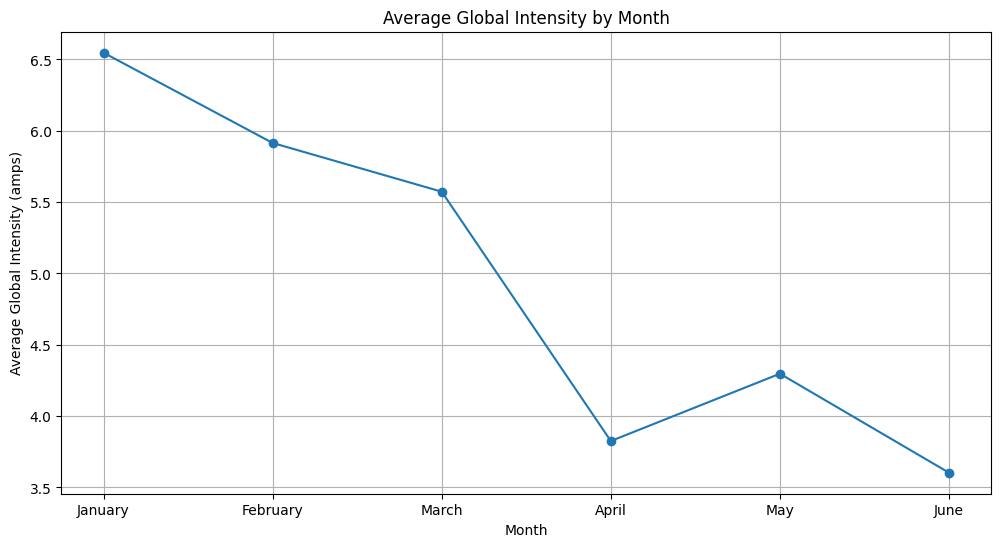

In [19]:
df_copy = df.copy()
# Making a graph for visualizing Global Intensity for every month
df_copy['Date'] = pd.to_datetime(df_copy['Date'], format='%d/%m/%Y')
df_copy['Month'] = df_copy['Date'].dt.month

df_copy['Global_intensity'] = pd.to_numeric(
    df_copy['Global_intensity'], errors='coerce')
monthly_avg_intensity = df_copy.groupby('Month')['Global_intensity'].mean()

month_names = ['January', 'February', 'March', 'April', 'May', 'June']

plt.figure(figsize=(12, 6))
plt.plot(month_names, monthly_avg_intensity, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Average Global Intensity (amps)')
plt.title('Average Global Intensity by Month')
plt.grid(True)
plt.show()


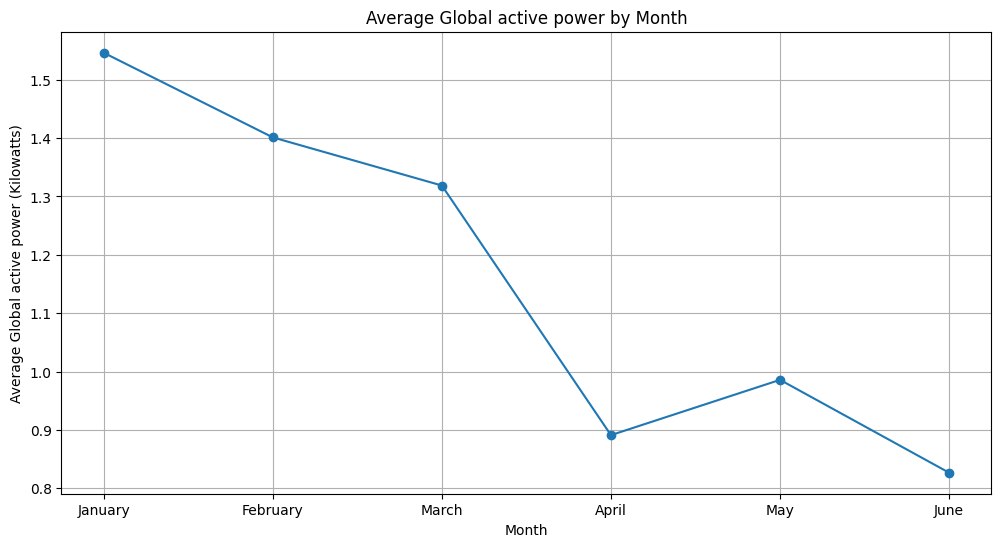

In [20]:
# Making a graph for visualising Global Intensity for every month
df_copy['Date'] = pd.to_datetime(df_copy['Date'], format='%d/%m/%Y')
df_copy['Month'] = df_copy['Date'].dt.month

df_copy['Global_active_power'] = pd.to_numeric(
    df_copy['Global_active_power'], errors='coerce')
monthly_avg_intensity = df_copy.groupby('Month')['Global_active_power'].mean()

month_names = ['January', 'February', 'March', 'April', 'May', 'June']

plt.figure(figsize=(12, 6))
plt.plot(month_names, monthly_avg_intensity, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Average Global active power (Kilowatts)')
plt.title('Average Global active power by Month')
plt.grid(True)
plt.show()


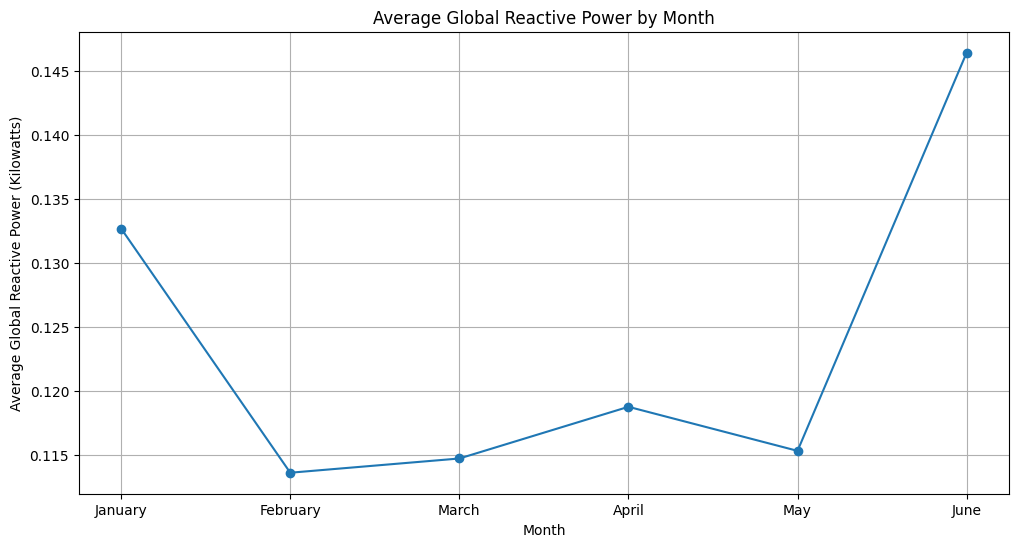

In [21]:
# Making a graph for visualising Global Reactive Power for every month
df_copy['Date'] = pd.to_datetime(df_copy['Date'], format='%d/%m/%Y')
df_copy['Month'] = df_copy['Date'].dt.month

df_copy['Global_reactive_power'] = pd.to_numeric(
    df_copy['Global_reactive_power'], errors='coerce')
monthly_avg_reactive_power = df_copy.groupby(
    'Month')['Global_reactive_power'].mean()

month_names = ['January', 'February', 'March', 'April', 'May', 'June']

plt.figure(figsize=(12, 6))
plt.plot(month_names, monthly_avg_reactive_power, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Average Global Reactive Power (Kilowatts)')
plt.title('Average Global Reactive Power by Month')
plt.grid(True)
plt.show()


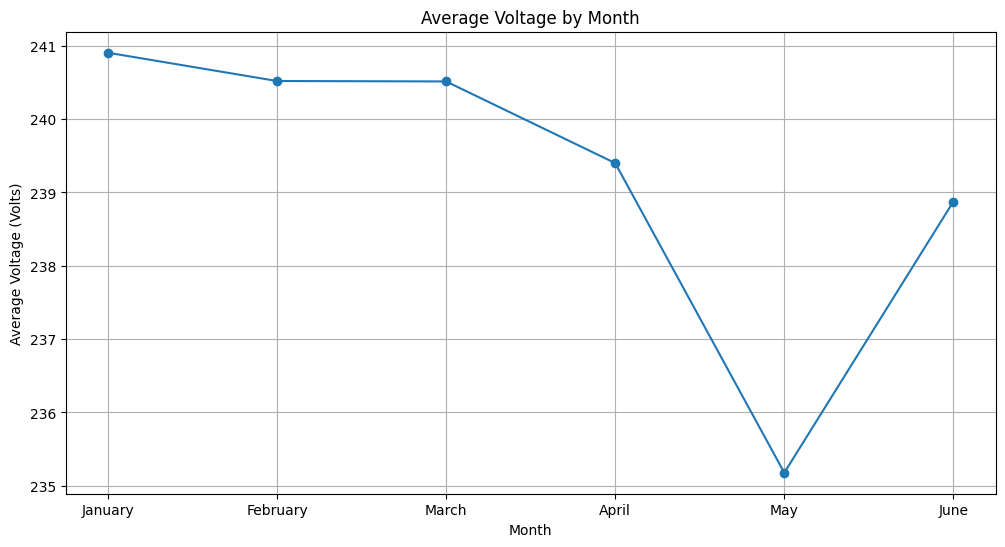

In [22]:
# Making a graph for visualising Average Voltage for every month
df_copy['Date'] = pd.to_datetime(df_copy['Date'], format='%d/%m/%Y')
df_copy['Month'] = df_copy['Date'].dt.month

df_copy['Voltage'] = pd.to_numeric(df_copy['Voltage'], errors='coerce')
monthly_avg_voltage = df_copy.groupby('Month')['Voltage'].mean()

month_names = ['January', 'February', 'March', 'April', 'May', 'June']

plt.figure(figsize=(12, 6))
plt.plot(month_names, monthly_avg_voltage, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Average Voltage (Volts)')
plt.title('Average Voltage by Month')
plt.grid(True)
plt.show()


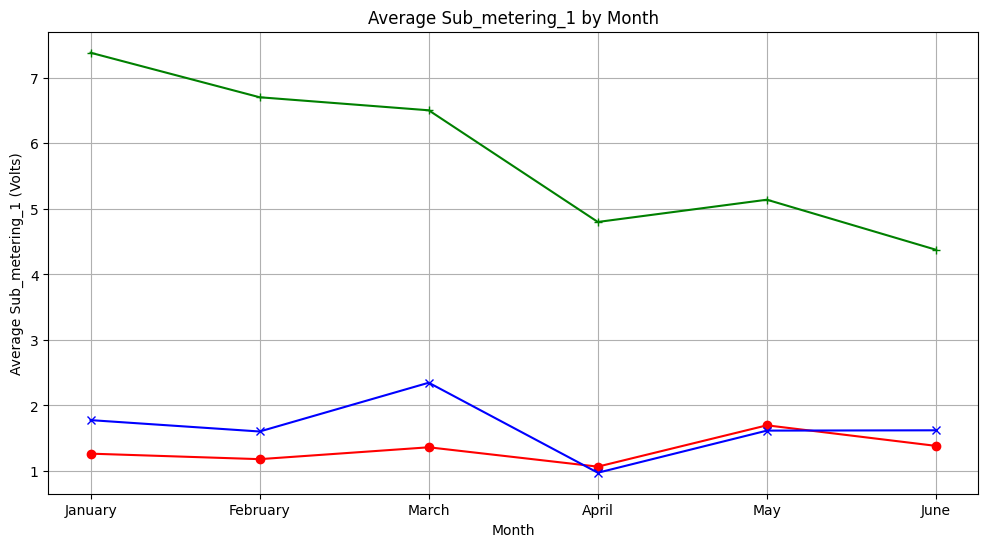

In [23]:
# Making a graph for visualising Global Intensity for every month
df_copy['Date'] = pd.to_datetime(df_copy['Date'], format='%d/%m/%Y')
df_copy['Month'] = df_copy['Date'].dt.month

df_copy['Sub_metering_1'] = pd.to_numeric(
    df_copy['Sub_metering_1'], errors='coerce')
df_copy['Sub_metering_2'] = pd.to_numeric(
    df_copy['Sub_metering_2'], errors='coerce')
df_copy['Sub_metering_3'] = pd.to_numeric(
    df_copy['Sub_metering_3'], errors='coerce')
monthly_avg_intensity_1 = df_copy.groupby('Month')['Sub_metering_1'].mean()
monthly_avg_intensity_2 = df_copy.groupby('Month')['Sub_metering_2'].mean()
monthly_avg_intensity_3 = df_copy.groupby('Month')['Sub_metering_3'].mean()

month_names = ['January', 'February', 'March', 'April', 'May', 'June']

plt.figure(figsize=(12, 6))
plt.plot(month_names, monthly_avg_intensity_1,
         marker='o', color='red', linestyle='-')
plt.plot(month_names, monthly_avg_intensity_2,
         marker='x', color='blue', linestyle='-')
plt.plot(month_names, monthly_avg_intensity_3,
         marker='+', color='green', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Average Sub_metering_1 (Volts)')
plt.title('Average Sub_metering_1 by Month')
plt.grid(True)
plt.show()


Scatter Plots


Text(0, 0.5, 'Voltage (Volts)')

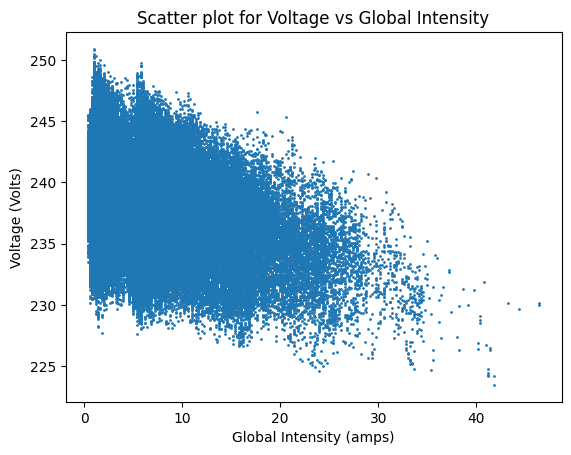

In [25]:
x1 = df_copy[['Global_intensity']]
y1 = df_copy['Voltage']
plt.scatter(x1, y1, s=1)
plt.title('Scatter plot for Voltage vs Global Intensity')
plt.xlabel("Global Intensity (amps)")
plt.ylabel("Voltage (Volts)")


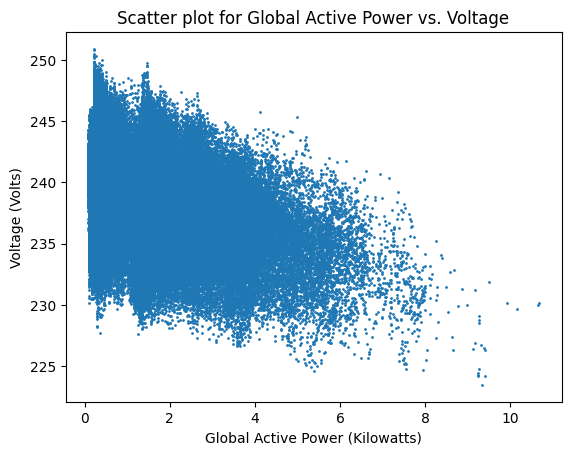

In [26]:
x2 = df_copy['Global_active_power']
y2 = df_copy['Voltage']

plt.scatter(x2, y2, s=1)
plt.title('Scatter plot for Global Active Power vs. Voltage')
plt.xlabel("Global Active Power (Kilowatts)")
plt.ylabel("Voltage (Volts)")
plt.show()


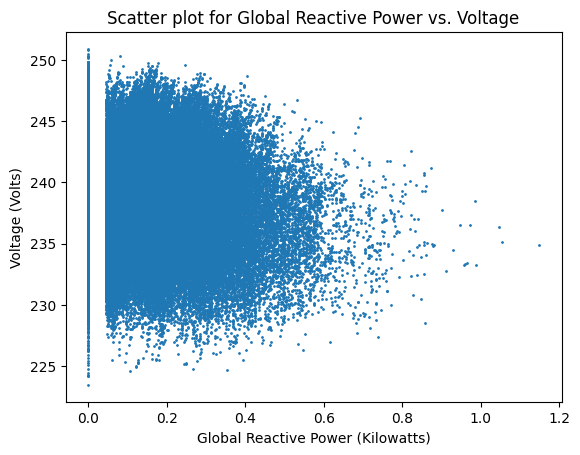

In [28]:
x4 = df_copy['Global_reactive_power']
y4 = df_copy['Voltage']

plt.scatter(x4, y4, s=1)
plt.title('Scatter plot for Global Reactive Power vs. Voltage')
plt.xlabel("Global Reactive Power (Kilowatts)")
plt.ylabel("Voltage (Volts)")
plt.show()


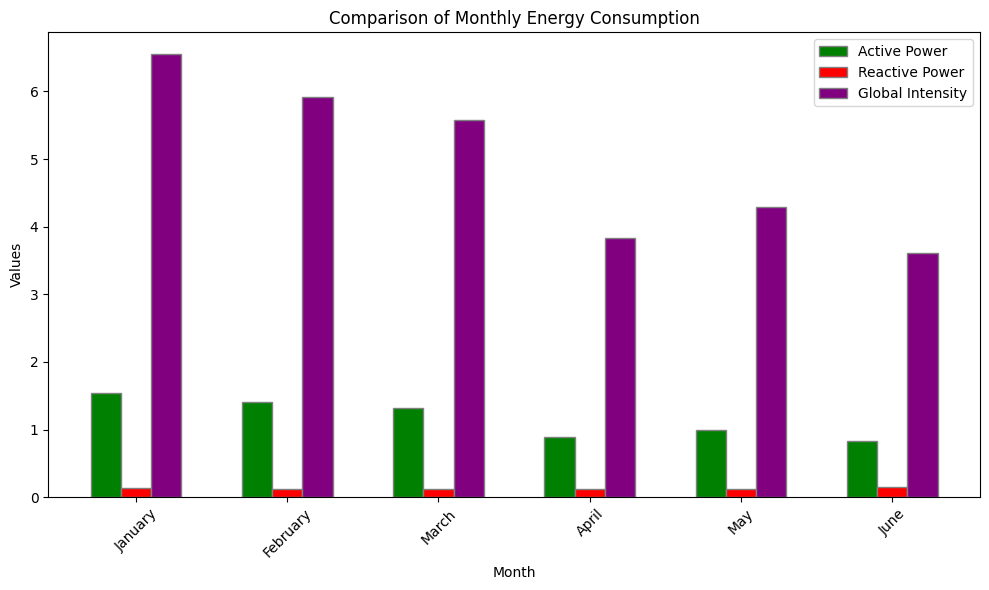

In [39]:
# Extract the month and year from the Date column
df_copy['Month'] = df_copy['Date'].dt.to_period('M')

# Filter DataFrame to include only data from January to June
df_filtered = df_copy[df_copy['Month'].dt.month <= 6]

#monthly averages
monthly_avg = df_filtered.groupby('Month').agg({
    'Global_active_power': 'mean',
    'Global_reactive_power': 'mean',
    'Global_intensity': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))

months = monthly_avg['Month']

active_power = monthly_avg['Global_active_power']
reactive_power = monthly_avg['Global_reactive_power']
global_intensity = monthly_avg['Global_intensity']

bar_width = 0.2

r1 = range(len(months))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.bar(r1, active_power, color='g', width=bar_width,edgecolor='grey', label='Active Power')
plt.bar(r2, reactive_power, color='r', width=bar_width,edgecolor='grey', label='Reactive Power')
plt.bar(r3, global_intensity, color='purple', width=bar_width,edgecolor='grey', label='Global Intensity')

plt.xlabel('Month')
plt.xticks(r2, months.dt.strftime('%B'), rotation=45)
plt.ylabel('Values')
plt.title('Comparison of Monthly Energy Consumption')
plt.legend()

plt.tight_layout()
plt.show()


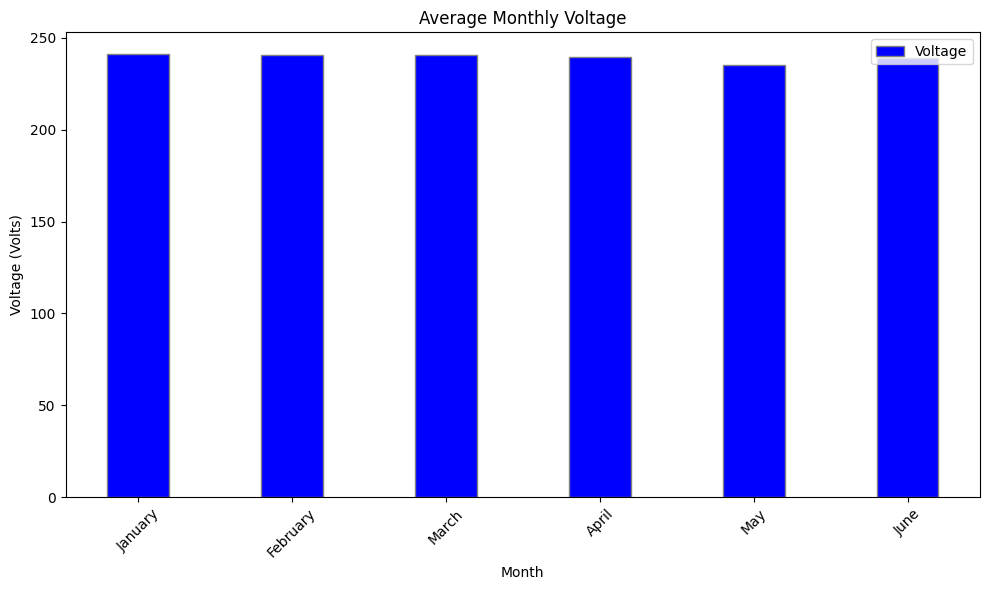

In [40]:
df_copy['Month'] = df_copy['Date'].dt.to_period('M')

# monthly average voltage
monthly_avg_voltage = df_copy.groupby('Month')['Voltage'].mean().reset_index()

plt.figure(figsize=(10, 6))

months = monthly_avg_voltage['Month']

voltage = monthly_avg_voltage['Voltage']

bar_width = 0.4

r1 = range(len(months))

plt.bar(r1, voltage, color='b', width=bar_width,edgecolor='grey', label='Voltage')

plt.xlabel('Month')
plt.xticks(r1, months.dt.strftime('%B'), rotation=45)
plt.ylabel('Voltage (Volts)')
plt.title('Average Monthly Voltage')
plt.legend()

plt.tight_layout()
plt.show()


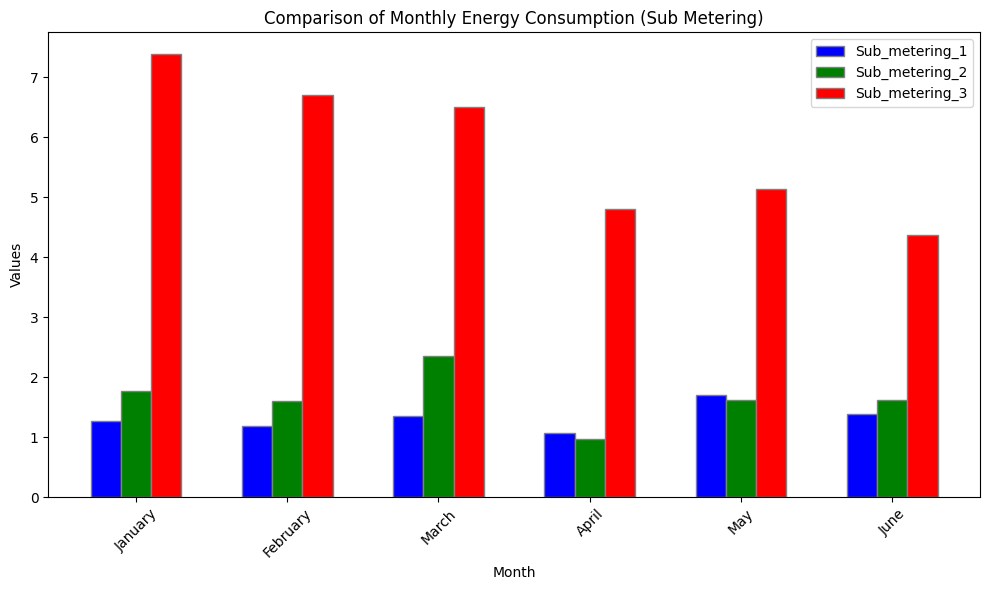

In [42]:
df_copy['Month'] = df_copy['Date'].dt.to_period('M')

# monthly averages
monthly_avg = df_copy.groupby('Month').agg({
    'Sub_metering_1': 'mean',
    'Sub_metering_2': 'mean',
    'Sub_metering_3': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))

months = monthly_avg['Month']

sub_metering_1 = monthly_avg['Sub_metering_1']
sub_metering_2 = monthly_avg['Sub_metering_2']
sub_metering_3 = monthly_avg['Sub_metering_3']

bar_width = 0.2

r1 = range(len(months))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, sub_metering_1, color='b', width=bar_width,edgecolor='grey', label='Sub_metering_1')
plt.bar(r2, sub_metering_2, color='g', width=bar_width,edgecolor='grey', label='Sub_metering_2')
plt.bar(r3, sub_metering_3, color='r', width=bar_width,edgecolor='grey', label='Sub_metering_3')

plt.xlabel('Month')
plt.xticks(r2, months.dt.strftime('%B'), rotation=45)
plt.ylabel('Values')
plt.title('Comparison of Monthly Energy Consumption (Sub Metering)')
plt.legend()

plt.tight_layout()
plt.show()


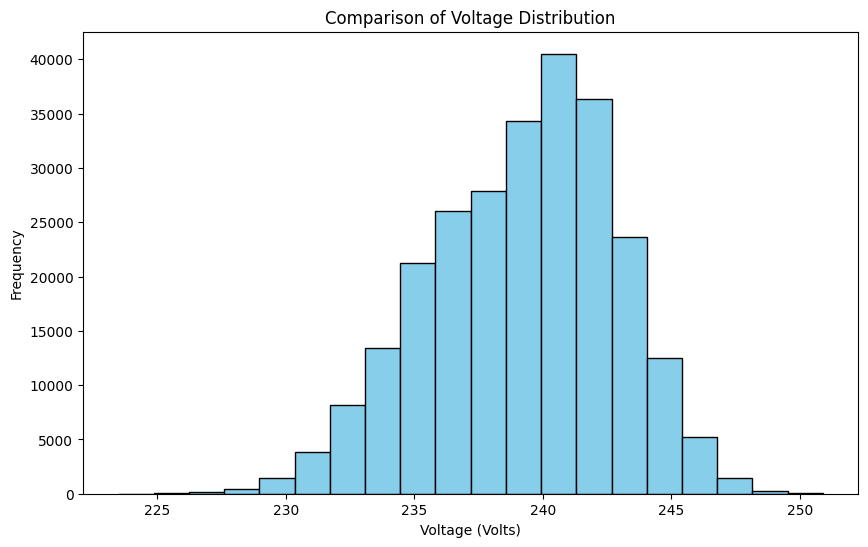

In [44]:

plt.figure(figsize=(10, 6))
plt.hist(df_copy['Voltage'], bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Voltage (Volts)')
plt.ylabel('Frequency')
plt.title('Comparison of Voltage Distribution')

plt.show()


Adding new feature Is_Weekend as binary indicators for weekends/weekdays

In [45]:

df_copy['Date'] = pd.to_datetime(df_copy['Date'], format='%d/%m/%y')

df_copy['Is_weekend'] = (df_copy['Date'].dt.dayofweek >= 5).astype(int)


In [51]:
df_copy.head(1000000)

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Is_weekend
0,0,2007-01-01,0 days 00:00:00,2.580,0.136,241.97,10.6,0,0,0.0,2007-01,0
1,1,2007-01-01,0 days 00:01:00,2.552,0.100,241.75,10.4,0,0,0.0,2007-01,0
2,2,2007-01-01,0 days 00:02:00,2.550,0.100,241.64,10.4,0,0,0.0,2007-01,0
3,3,2007-01-01,0 days 00:03:00,2.550,0.100,241.71,10.4,0,0,0.0,2007-01,0
4,4,2007-01-01,0 days 00:04:00,2.554,0.100,241.98,10.4,0,0,0.0,2007-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...
260635,260635,2007-06-30,0 days 23:55:00,2.880,0.360,239.01,12.0,0,0,18.0,2007-06,1
260636,260636,2007-06-30,0 days 23:56:00,2.892,0.358,238.86,12.2,0,0,17.0,2007-06,1
260637,260637,2007-06-30,0 days 23:57:00,2.882,0.280,239.05,12.0,0,0,18.0,2007-06,1
260638,260638,2007-06-30,0 days 23:58:00,2.660,0.290,238.98,11.2,0,0,18.0,2007-06,1


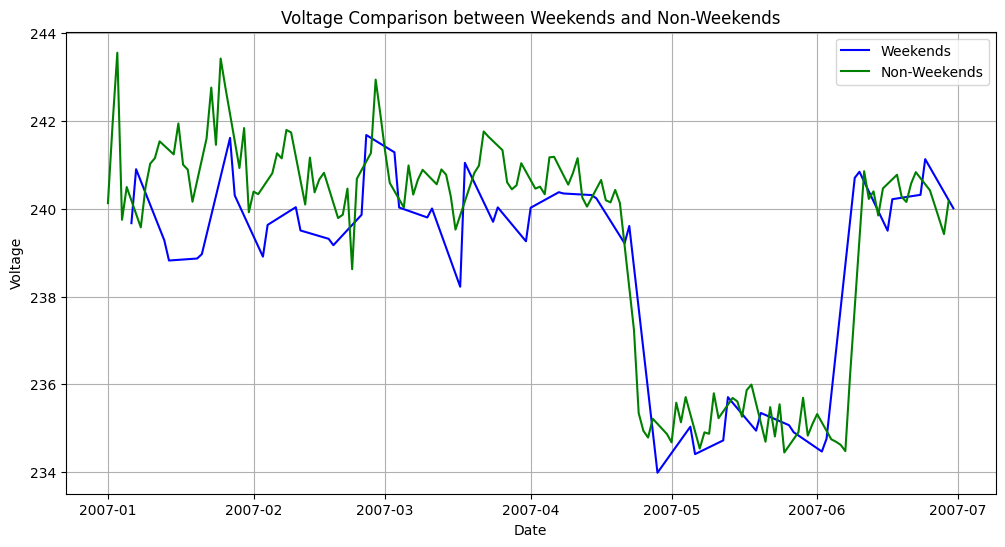

In [61]:
# Voltage Comparison between Weekends and Non-Weekends
df_copy['Date'] = pd.to_datetime(df_copy['Date'])

daily_avg = df_copy.groupby(['Date', 'Is_weekend'])['Voltage'].mean().reset_index()

weekend_data = daily_avg[daily_avg['Is_weekend'] == 1]
non_weekend_data = daily_avg[daily_avg['Is_weekend'] == 0]

plt.figure(figsize=(12, 6))

plt.plot(weekend_data['Date'], weekend_data['Voltage'],label='Weekends', color='blue')
plt.plot(non_weekend_data['Date'], non_weekend_data['Voltage'],label='Non-Weekends', color='green')

plt.xlabel('Date')
plt.ylabel('Voltage')
plt.title('Voltage Comparison between Weekends and Non-Weekends')
plt.legend()
plt.grid(True)
plt.show()
